In [1]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing

In [42]:
#importing the dataset
dataset = pd.read_csv("pima-indians-diabetes-1.csv")
print(dataset.shape)

(768, 9)


In [43]:
dataset.head(20)

,Preg,Plas,Pres,skin,test,mass,pedi,age,dia_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [44]:
#Observation 1:
# 1. Skin thickness and bloodpressure is 0 in some readings.
# 2. We will plan to put some valid values to it.
# 3. Column - "Outcome" is the target dependent variable.

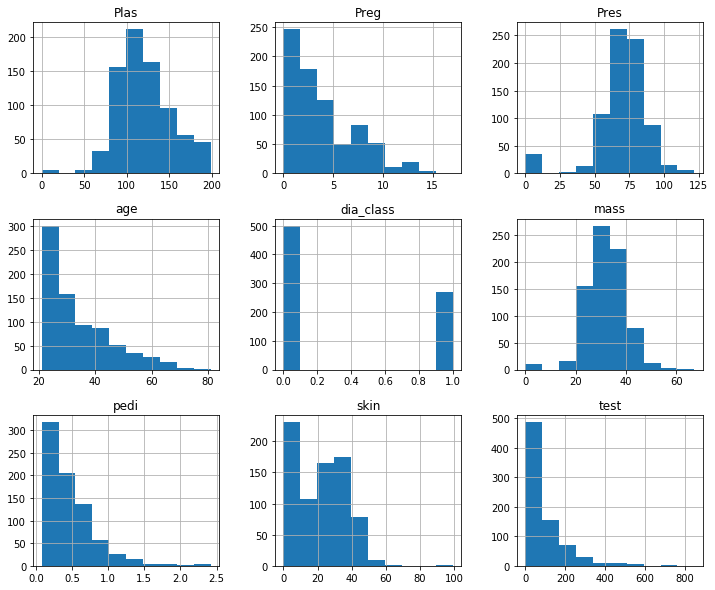

In [45]:
dataset.hist(figsize=(12, 10))
plt.show()

In [46]:
#Correction of Input Data
dataset_fresh = pd.DataFrame({'Pres': [0]})
print (dataset_fresh)

   Pres
0     0


In [47]:
mean_bloodpressure = dataset['Pres'].mean(skipna=True)
print (mean_bloodpressure)

69.10546875


In [48]:
#importing the dataset again
dataset = pd.read_csv("pima-indians-diabetes-1.csv")
print(dataset.shape)
dataset.head(20)

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,dia_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
#Mean Values
mean_bloodpressure = dataset['Pres'].mean(skipna=True)
mean_BMI = dataset['mass'].mean(skipna=True)
mean_skin = dataset['skin'].mean(skipna=True)
mean_Insulin = dataset['Plas'].mean(skipna=True)
print ("Mean BP",mean_bloodpressure)
print ("Mean SkinThickness",mean_skin)
print ("Mean BMI",mean_BMI)
print ("Mean Insulin",mean_Insulin)

Mean BP 69.10546875
Mean SkinThickness 20.536458333333332
Mean BMI 31.992578124999977
Mean Insulin 120.89453125


In [50]:
dataset=dataset.replace({'Pres': {0: mean_bloodpressure}})
dataset=dataset.replace({'skin': {0: mean_skin}})
dataset=dataset.replace({'mass': {0: mean_BMI}})
dataset=dataset.replace({'Plas': {0: mean_Insulin}})
print(dataset)

     Preg   Plas       Pres       skin  test       mass   pedi  age  dia_class
0       6  148.0  72.000000  35.000000     0  33.600000  0.627   50          1
1       1   85.0  66.000000  29.000000     0  26.600000  0.351   31          0
2       8  183.0  64.000000  20.536458     0  23.300000  0.672   32          1
3       1   89.0  66.000000  23.000000    94  28.100000  0.167   21          0
4       0  137.0  40.000000  35.000000   168  43.100000  2.288   33          1
5       5  116.0  74.000000  20.536458     0  25.600000  0.201   30          0
6       3   78.0  50.000000  32.000000    88  31.000000  0.248   26          1
7      10  115.0  69.105469  20.536458     0  35.300000  0.134   29          0
8       2  197.0  70.000000  45.000000   543  30.500000  0.158   53          1
9       8  125.0  96.000000  20.536458     0  31.992578  0.232   54          1
10      4  110.0  92.000000  20.536458     0  37.600000  0.191   30          0
11     10  168.0  74.000000  20.536458     0  38.000

In [51]:
dataset.head(20)

,Preg,Plas,Pres,skin,test,mass,pedi,age,dia_class
0,6,148.0,72.000000,35.000000,0,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,0,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,0,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,0,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,0,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,0,31.992578,0.232,54,1


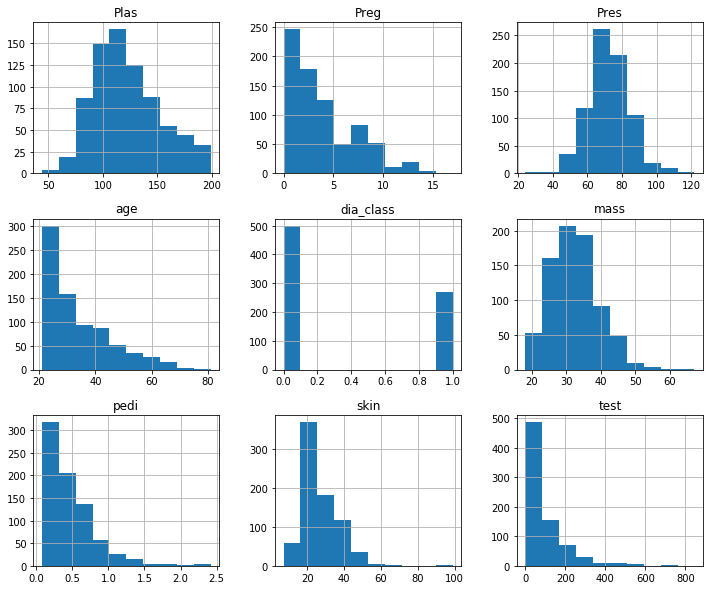

In [52]:
dataset.hist(figsize=(12, 10))
plt.show()

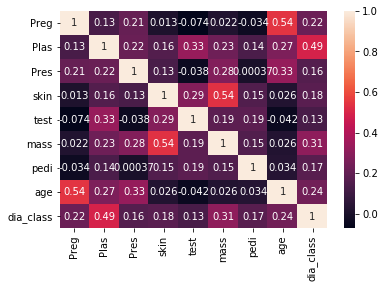

In [53]:
# Find Correlation
correl = dataset[dataset.columns].corr()
sns.heatmap(correl, annot = True)
plt.show()

In [54]:
dataset.head(2)

,Preg,Plas,Pres,skin,test,mass,pedi,age,dia_class
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0


In [55]:
## Deep copy
DB_rev = dataset.copy(deep=True)

In [56]:
# Hot Encoding
le = preprocessing.LabelEncoder()
mass = le.fit_transform(dataset.mass)
skin = le.fit_transform(dataset.skin)
Plas   = le.fit_transform(dataset.Plas)
Pres = le.fit_transform(dataset.Pres)
Class_Diabetic = le.fit_transform(dataset.dia_class)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

In [58]:
#initialize the encoded categorical columns
DB_rev['mass'] = mass
DB_rev['skin'] = skin
DB_rev['Plas'] = Plas
DB_rev['Pres'] = Pres
DB_rev['Class_Diabetic'] = Class_Diabetic

In [59]:
DB_rev.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,dia_class,Class_Diabetic
0,6,86,22,28,0,123,0.627,50,1,1
1,1,22,18,22,0,61,0.351,31,0,0
2,8,121,16,13,0,29,0.672,32,1,1
3,1,26,18,16,94,76,0.167,21,0,0
4,0,75,3,28,168,209,2.288,33,1,1


In [61]:
#drop the old categorical columns from dataframe
dummy_fields = ['Preg','test','pedi','age','dia_class']
DB_rev = DB_rev.drop(dummy_fields, axis = 1)

In [62]:
DB_rev.head()

,Plas,Pres,skin,mass,Class_Diabetic
0,86,22,28,123,1
1,22,18,22,61,0
2,121,16,13,29,1
3,26,18,16,76,0
4,75,3,28,209,1


# Data Slicing

In [67]:
# Arrange data into independent variables and dependent variables
X = DB_rev.values[:,1:3]  ## Independent variables
Y = DB_rev.values[:,4]  ## Target Diabetic classification

In [68]:
# Split the data into train and test
# Train data size: 70% of original data
# Test data size: 30% of original data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

# Implement Naive Bayes

In [77]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
#rng = np.random.RandomState(0)
#Xnew_testdata = [-6, -14] + [14, 18] * rng.rand(2000, 2)

In [79]:
Y_pred = clf.predict(X_test)

In [94]:
accuracy_score(Y_test, Y_pred, normalize = True)

0.6060606060606061

# Accuracy Score

In [81]:
# Displaying the data for Better Understanding

In [97]:
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

Accuracy of GNB classifier on training set: 0.67
Accuracy of GNB classifier on test set: 0.61


# Trying to plot to classify the category

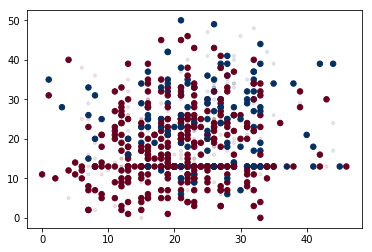

In [98]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=30, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, s=10, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# NOTE

In [101]:
#We can clearly see that plotting will not be much usefull as the independent variables 
# and total sample are not enough
# We must try other algos to predict like Logistic Regression, Classification Trees, Random Forest and SVM etc.